In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Nesta atividade iremos considerar dados estatisticamente independentes com função densidade de probabilidade gaussiana, de valor verdadeiro 𝑥0 = 0 e desvio-padrão verdadeiro 𝜎0 = 1. Gere 𝑀 = 10.000 conjuntos de 𝑁 = 5 dados cada e, para cada conjunto, calcule o desvio-padrão amostral, 𝑠, e a variância amostral, 𝑉.

In [2]:
def func(x0, σ0, M, N):
    return x0 + σ0 * np.random.rand(M, N)
x0, σ0, M, N = 0, 1, 10000, 5
p = func(x0, σ0, M, N)

In [3]:
desvp, var = np.zeros((M,1)), np.zeros((M,1))
for i, vec in enumerate(p):
    desvp[i] = np.var(vec)
    var[i] = np.std(vec, ddof=1)

a) Faça histogramas dos 𝑀 valores de 𝑠 e de 𝑉 (imagens desses histogramas para os casos de N=100, N=5
e N=2 deverão ser enviados).

N = 100

In [4]:
N = 100
p = func(x0, σ0, M, N)
desvp, var = np.zeros((M,1)), np.zeros((M,1))
for i, vec in enumerate(p):
    desvp[i] = np.var(vec)
    var[i] = np.std(vec, ddof=1)

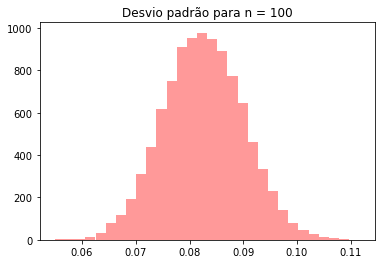

In [5]:
sns.distplot(desvp, kde=False, bins=30, color='r')
plt.title('Desvio padrão para n = '+ str(N))
plt.savefig('TEFE21/desvpad' + str(N) + '.png')

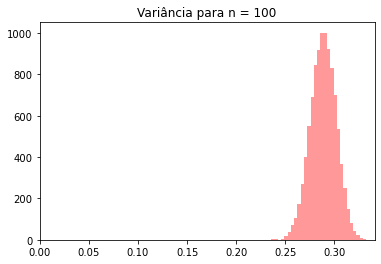

In [6]:
sns.distplot(var, kde=False, bins=30, color='r')
plt.xlim(0)
plt.title('Variância para n = '+ str(N))
plt.savefig('TEFE21/var' + str(N) + '.png')

N = 5

In [7]:
N = 5
p = func(x0, σ0, M, N)
desvp, var = np.zeros((M,1)), np.zeros((M,1))
for i, vec in enumerate(p):
    desvp[i] = np.var(vec)
    var[i] = np.std(vec, ddof=1)

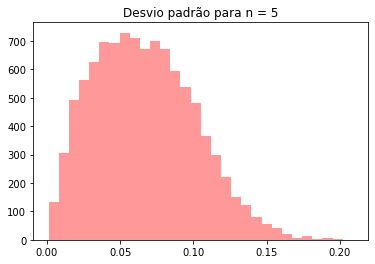

In [8]:
sns.distplot(desvp, kde=False, bins=30, color='r')
plt.title('Desvio padrão para n = '+ str(N))
plt.savefig('TEFE21/desvpad' + str(N) + '.png')

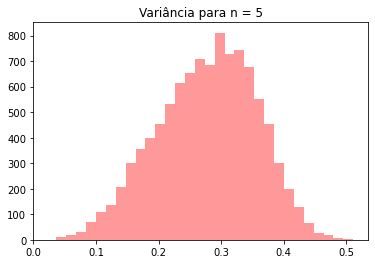

In [9]:
sns.distplot(var, kde=False, bins=30, color='r')
plt.xlim(0)
plt.title('Variância para n = '+ str(N))
plt.savefig('TEFE21/var' + str(N) + '.png')

N = 2

In [10]:
N = 2
p = func(x0, σ0, M, N)
desvp, var = np.zeros((M,1)), np.zeros((M,1))
for i, vec in enumerate(p):
    desvp[i] = np.var(vec)
    var[i] = np.std(vec, ddof=1)

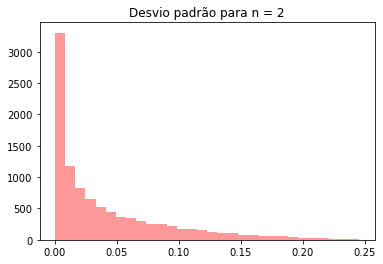

In [11]:
sns.distplot(desvp, kde=False, bins=30, color='r')
plt.title('Desvio padrão para n = '+ str(N))
plt.savefig('TEFE21/desvpad' + str(N) + '.png')

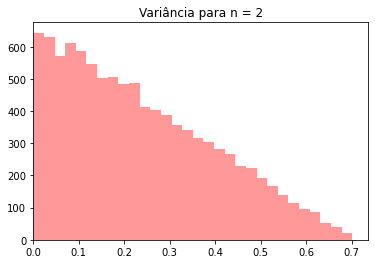

In [12]:
sns.distplot(var, kde=False, bins=30, color='r')
plt.xlim(0)
plt.title('Variância para n = '+ str(N))
plt.savefig('TEFE21/var' + str(N) + '.png')

b) Usando os 𝑀 valores de 𝑠 e 𝑉 , calcule as grandezas pedidas a seguir, preenchendo a coluna
correspondente da tabela:
    
b.1) Calcule 𝑠𝑚, a média dos 𝑀 valores do desvio-padrão amostral, 𝑠. Estime a incerteza de 𝑠𝑚.

b.2) Calcule 𝑉𝑚, o valor médio dos 𝑀 valores da variância amostral, 𝑉 = 𝑠2. Estime a incerteza de 𝑉𝑚.

b.3) Quantos dos 𝑀 valores de 𝑠 são menores que o desvio-padrão verdadeiro, 𝜎0? E quantos valoresde 𝑉 são menores que a variância verdadeira, 𝑉0 = 𝜎0 2? Estime a incerteza nessas contagens.

Repita para os casos em que 𝑁 = 100, 50, 10, 4, 3 𝑒 2 (sempre para 𝑀 = 10.000 conjuntos) epreencha toda a tabela (uma foto ou arquivo pdf da tabela preenchida deverá ser enviada).

Vamos fazer isso com DataFrames.

In [13]:
import pandas as pd

In [14]:
N = (100, 50, 10, 5, 4, 3, 2)
Sm, Vm, Sn, Vn = np.zeros(len(N)), np.zeros(len(N)), np.zeros(len(N)), np.zeros(len(N))
for i, valor in enumerate(N):
    p = func(x0, σ0, M, valor)
    desvp, var = np.zeros((M,1)), np.zeros((M,1))
    for j, vec in enumerate(p):
        desvp[j] = np.var(vec)
        var[j] = np.std(vec, ddof=1)
    Sm[i] = np.mean(p)
    Vm[i] = np.mean(var)
    Sn[i] = np.sum(p <= σ0)
    Vn[i] = np.sum( Vm <= σ0**2 )
arr = np.stack((Sm, Vm, Sn, Vn), axis=0)


idx = {'': ['Sm', 'Vm', 's <= σ0', 'V <= V0']}
d = {'N = 100': arr[:,0], 'N = 50': arr[:,1], 'N = 10': arr[:,2], 
     'N = 5': arr[:,3], 'N = 4': arr[:,4], 'N = 3': arr[:,5], 'N = 2': arr[:,6]}
df = pd.DataFrame(data=d, index=['Sm', 'Vm', 's <= σ0', 'V <= V0'])

In [15]:
df

,N = 100,N = 50,N = 10,N = 5,N = 4,N = 3,N = 2
Sm,0.499676,0.499995,0.500370,0.500326,0.500099,0.497056,0.501658
Vm,0.288507,0.287897,0.284265,0.276607,0.274000,0.263116,0.234112
s <= σ0,1000000.000000,500000.000000,100000.000000,50000.000000,40000.000000,30000.000000,20000.000000
V <= V0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
